Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
X shape: (400, 4)
y shape: (400,)
   const  Price  Urban_Yes  US_Yes
0    1.0    120          1       1
1    1.0     83          1       1
2    1.0     80          1       1
3    1.0     97          1       1
4    1.0    128          1       0
0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          

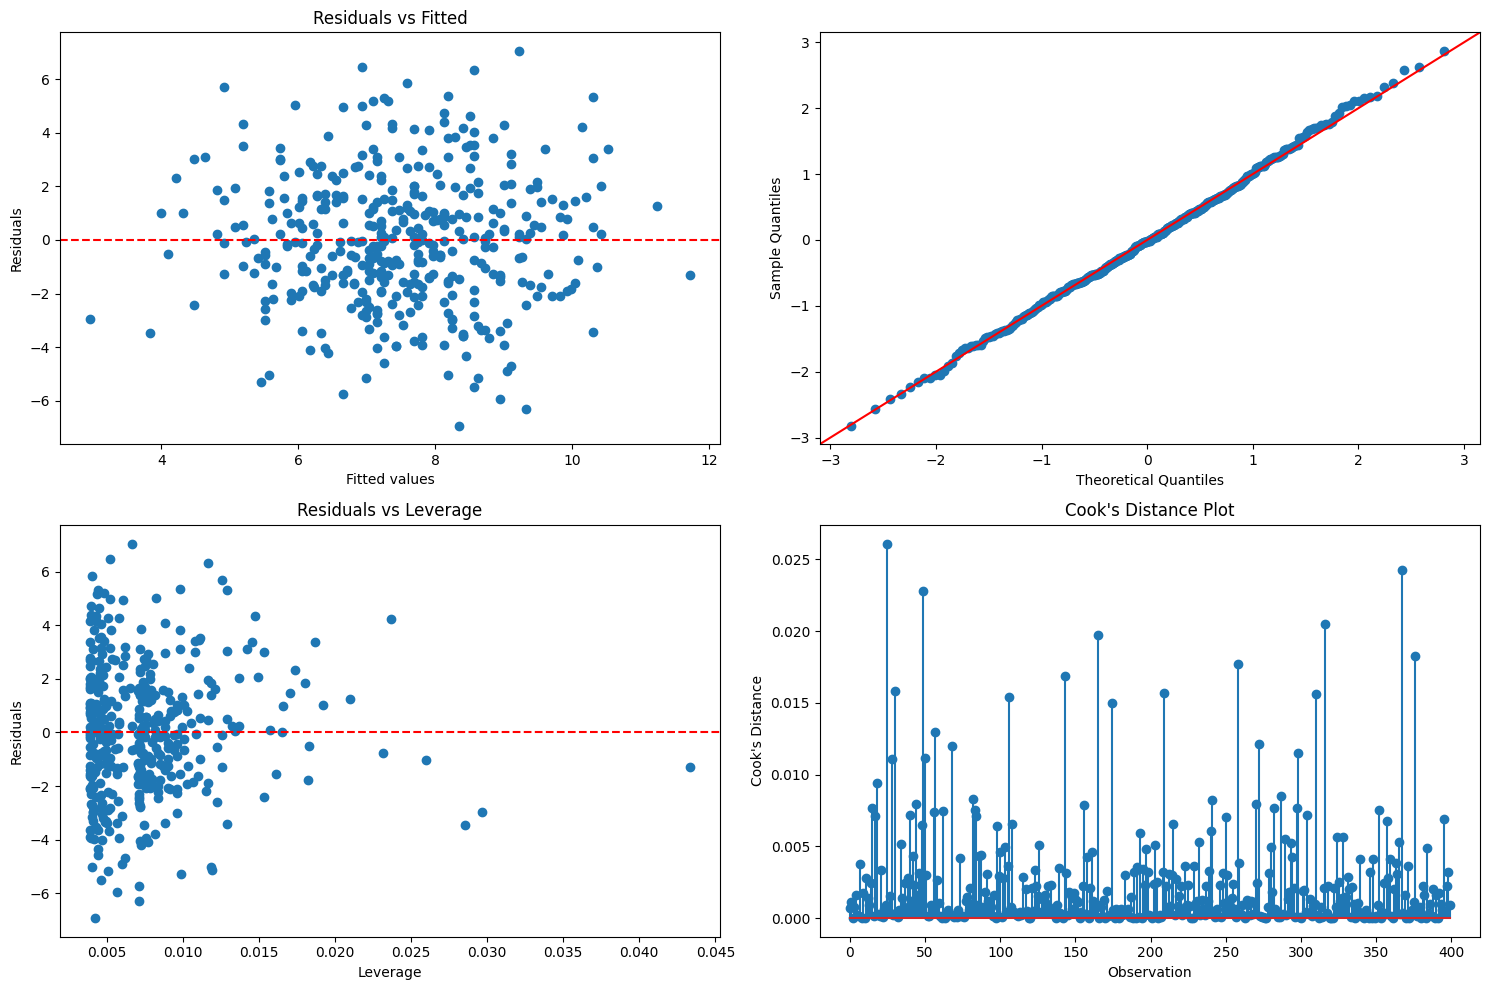


Part (h): Outlier and Leverage Analysis

Potential outliers (standardized residuals > 2 or < -2):
Number of outliers: 23

High leverage points (leverage > 2p/n):
Number of high leverage points: 20


In [5]:
# Exercise 10: Analysis of Carseats Dataset
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# data
carseats = pd.read_csv('Carseats.csv')

# data types
print(carseats.dtypes)

# Convert categorical columns 'Urban' and 'US' to dummy variables using pd.get_dummies()
# drop_first=True is used to avoid multicollinearity
X = carseats[['Price', 'Urban', 'US']]
X = pd.get_dummies(X, drop_first=True)

# Ensure that dummy variables (Urban_Yes, US_Yes) are numeric (convert from True/False to 0/1)
X['Urban_Yes'] = X['Urban_Yes'].astype(int)
X['US_Yes'] = X['US_Yes'].astype(int)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the target variable (Sales)
y = carseats['Sales']

# Check the cleaned data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(X.head())
print(y.head())

# Fit the OLS model
try:
    model = sm.OLS(y, X).fit()  # Fit the model
    print("\nRegression Summary:")
    print(model.summary())
except Exception as e:
    print(f"Error while fitting the model: {e}")

# Part (b): Coefficient interpretation
if 'model' in locals():
    print("\nPart (b): Coefficient Interpretations:")
    for var in model.params.index:
        print(f"\n{var}:")
        print(f"Coefficient: {model.params[var]:.4f}")
        print(f"P-value: {model.pvalues[var]:.4f}")
        print(f"95% CI: ({model.conf_int().loc[var][0]:.4f}, {model.conf_int().loc[var][1]:.4f})")

    # Part (c): Write equation
    print("\nPart (c): Model Equation:")
    print("Sales = β₀ + β₁×Price + β₂×Urban + β₃×US")
    print(f"Sales = {model.params['const']:.2f} + {model.params['Price']:.2f}×Price ", end="")
    for var in model.params.index[2:]:
        print(f"+ {model.params[var]:.2f}×{var} ", end="")
    print()

    # Part (d): Test null hypothesis
    print("\nPart (d): Hypothesis Testing")
    significant_vars = model.pvalues[model.pvalues < 0.05]
    print("\nSignificant variables (p < 0.05):")
    for var, p_val in significant_vars.items():
        print(f"{var}: p-value = {p_val:.4f}")

    # Part (e): Fit reduced model
    significant_predictors = [var for var in X.columns if var in significant_vars.index or var == 'const']
    X_reduced = X[significant_predictors]
    reduced_model = sm.OLS(y, X_reduced).fit()

    print("\nPart (e): Reduced Model Summary:")
    print(reduced_model.summary())

    # Part (f): Compare models
    print("\nPart (f): Model Comparison")
    print(f"Full Model R-squared: {model.rsquared:.4f}")
    print(f"Reduced Model R-squared: {reduced_model.rsquared:.4f}")
    print(f"Full Model AIC: {model.aic:.4f}")
    print(f"Reduced Model AIC: {reduced_model.aic:.4f}")

    # Part (g): Confidence intervals
    print("\nPart (g): 95% Confidence Intervals for Reduced Model")
    print(reduced_model.conf_int())

    # Part (h): Diagnostic plots for reduced model
    plt.figure(figsize=(15, 10))

    # Residual plot
    plt.subplot(221)
    plt.scatter(reduced_model.fittedvalues, reduced_model.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')

    # Q-Q plot
    plt.subplot(222)
    sm.graphics.qqplot(reduced_model.resid, line='45', fit=True, ax=plt.gca())

    # Leverage plot
    influence = OLSInfluence(reduced_model)
    plt.subplot(223)
    plt.scatter(influence.hat_matrix_diag, reduced_model.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Leverage')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Leverage')

    # Cook's distance
    plt.subplot(224)
    plt.stem(influence.cooks_distance[0])
    plt.xlabel('Observation')
    plt.ylabel("Cook's Distance")
    plt.title("Cook's Distance Plot")

    plt.tight_layout()
    plt.show()

    print("\nPart (h): Outlier and Leverage Analysis")
    print("\nPotential outliers (standardized residuals > 2 or < -2):")
    std_resid = reduced_model.resid / np.sqrt(reduced_model.scale)
    outliers = np.where(abs(std_resid) > 2)[0]
    print(f"Number of outliers: {len(outliers)}")

    print("\nHigh leverage points (leverage > 2p/n):")
    p = len(X_reduced.columns)
    n = len(X_reduced)
    leverage_threshold = 2 * p / n
    high_leverage = np.where(influence.hat_matrix_diag > leverage_threshold)[0]
    print(f"Number of high leverage points: {len(high_leverage)}")
